<a href="https://colab.research.google.com/github/anamulislam0805/Big_Data_Lab/blob/main/Lab_work_24_8_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [ ]:
df = pd.read_csv('/content/cars.csv')

In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [ ]:
df.shape

(8128, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [ ]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [ ]:
df['fuel'].nunique()

4

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['fuel']= le.fit_transform(df['fuel'])

In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,1,First Owner,450000
1,Skoda,120000,1,Second Owner,370000
2,Honda,140000,3,Third Owner,158000
3,Hyundai,127000,1,First Owner,225000
4,Maruti,120000,3,First Owner,130000


In [ ]:
df['brand'].nunique()

32

In [ ]:
le=LabelEncoder()
df['brand']= le.fit_transform(df['brand'])

In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,20,145500,1,First Owner,450000
1,27,120000,1,Second Owner,370000
2,10,140000,3,Third Owner,158000
3,11,127000,1,First Owner,225000
4,20,120000,3,First Owner,130000


In [ ]:
df['owner'].nunique()

5

In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car']])
df[['owner']]= oe.fit_transform(df[['owner']])

In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,20,145500,1,0.0,450000
1,27,120000,1,1.0,370000
2,10,140000,3,2.0,158000
3,11,127000,1,0.0,225000
4,20,120000,3,0.0,130000


<Axes: xlabel='km_driven'>

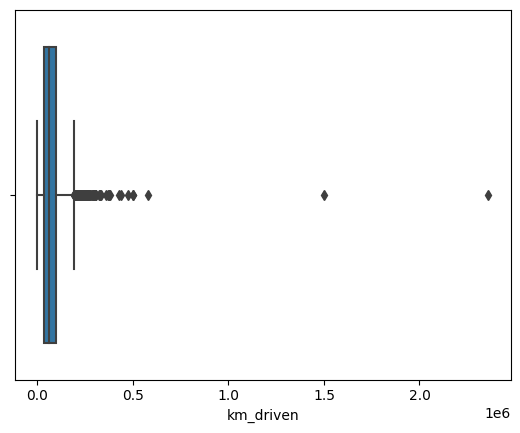

In [ ]:
sns.boxplot(data=df, x="km_driven")

In [ ]:
print("Std value of cgpa",df['km_driven'].std())
print("Min value of cgpa",df['km_driven'].min())
print("Max value of cgpa",df['km_driven'].max())

Std value of cgpa 56550.554958219196
Min value of cgpa 1
Max value of cgpa 2360457


In [ ]:
df['km_driven'].nunique()

921

In [ ]:
upper_limit= df['km_driven'].mean() + 2.5*df['km_driven'].std()
lower_limit= df['km_driven'].mean() - 2.5*df['km_driven'].std()

In [ ]:
outlier = df[(df['km_driven'] > upper_limit) | (df['km_driven'] < lower_limit)]
new_df = df[(df['km_driven'] < upper_limit) & (df['km_driven'] > lower_limit)]

In [ ]:
new_df.shape

(8022, 5)

In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,20,145500,1,0.0,450000
1,27,120000,1,1.0,370000
2,10,140000,3,2.0,158000
3,11,127000,1,0.0,225000
4,20,120000,3,0.0,130000


In [ ]:
X = df.drop(columns=['selling_price'],axis=1)
Y = df['selling_price']

In [ ]:
Y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
X_scaled

array([[ 0.27221586,  1.33836255, -0.88911544, -0.64040274],
       [ 1.22251613,  0.88741086, -0.88911544,  0.74506265],
       [-1.08535595,  1.24109846,  1.10639203,  2.13052804],
       ...,
       [ 0.27221586,  0.88741086, -0.88911544, -0.64040274],
       [ 1.35827331, -0.79260528, -0.88911544, -0.64040274],
       [ 1.35827331, -0.79260528, -0.88911544, -0.64040274]])

In [ ]:
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
X_scaled.head()

,0,1,2,3
0,0.272216,1.338363,-0.889115,-0.640403
1,1.222516,0.887411,-0.889115,0.745063
2,-1.085356,1.241098,1.106392,2.130528
3,-0.949599,1.011202,-0.889115,-0.640403
4,0.272216,0.887411,1.106392,-0.640403


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, ytrain, ytest = train_test_split(X_scaled,Y,test_size = 0.25, shuffle= True, random_state=42)

In [ ]:
# Applying Box-Cox Transform

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(x_train+ 0.00001 )
X_test_transformed = pt.transform(x_test+0.000001)
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,0,1.116971
1,1,0.211284
2,2,0.583101
3,3,-0.781089
